In [1]:
import pandas as pd



In [5]:
datos = pd.read_csv("Absorbancia_Illy_limpio.csv")

In [6]:
datos.head()

,nm,A
0,200.0,NaN
1,200.5,NaN
2,201.0,NaN
3,201.5,NaN
4,202.0,NaN


In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   nm      421 non-null    float64
 1   A       379 non-null    float64
dtypes: float64(2)
memory usage: 6.7 KB


array([[<Axes: title={'center': 'nm'}>, <Axes: title={'center': 'A'}>]],
      dtype=object)

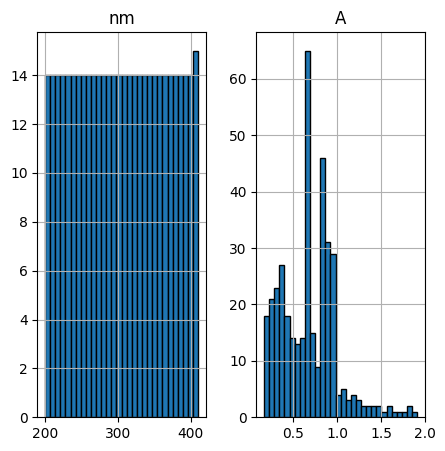

In [8]:
datos.hist(figsize=(5,5), bins=30, edgecolor="black")

In [9]:
x=datos["nm"]
y=datos["A"]

In [10]:
x

0      200.0
1      200.5
2      201.0
3      201.5
4      202.0
       ...  
416    408.0
417    408.5
418    409.0
419    409.5
420    410.0
Name: nm, Length: 421, dtype: float64

In [11]:
y

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
416   NaN
417   NaN
418   NaN
419   NaN
420   NaN
Name: A, Length: 421, dtype: float64

In [12]:
x.value_counts()

nm
410.0    1
200.0    1
200.5    1
201.0    1
201.5    1
        ..
204.5    1
204.0    1
203.5    1
203.0    1
202.5    1
Name: count, Length: 421, dtype: int64

In [13]:
y.value_counts()

A
0.671    11
0.670     9
0.825     7
0.669     6
0.672     6
         ..
1.297     1
1.323     1
1.350     1
1.377     1
1.405     1
Name: count, Length: 300, dtype: int64

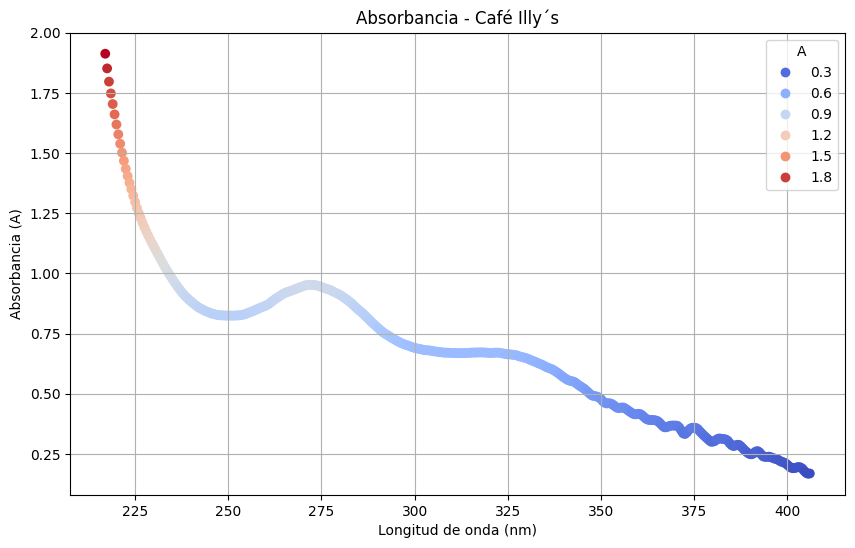

In [20]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(10,6))
sb.scatterplot(x=x, y=y, data=datos, hue="A", palette="coolwarm", s=50, edgecolor="none")
plt.title("Absorbancia - Café Illy´s")
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("Absorbancia (A)")
plt.legend(title="A", loc="best")
plt.grid(None)
plt.show()

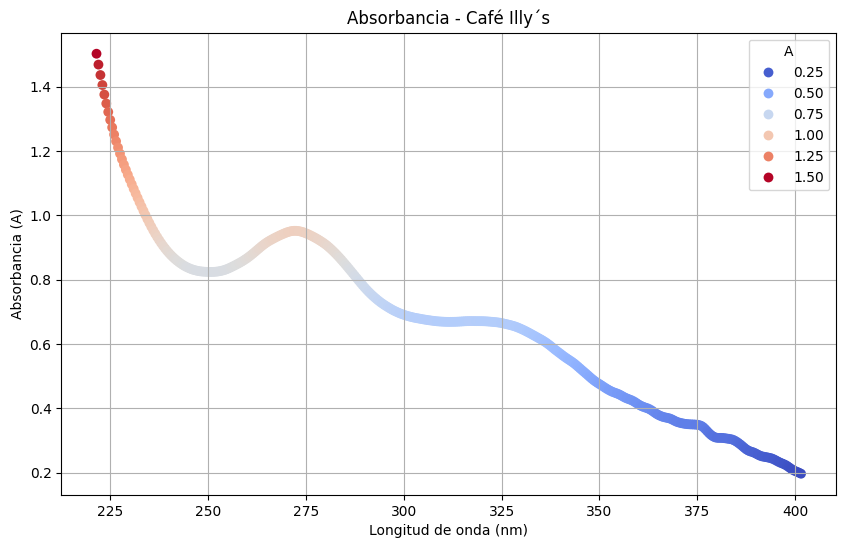

In [21]:
#Vamos a usar el filtro de Savitzky-Golay para suavizar la curva

from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
import seaborn as sb

#Creamos la columna suavizada para los datos de absorbancia

datos["A_suavizada"] = savgol_filter(datos["A"], window_length=19, polyorder=3)
plt.figure(figsize=(10,6))
sb.scatterplot(x=x, y="A_suavizada", data=datos, hue="A_suavizada", palette="coolwarm", s=50, edgecolor="none")
plt.title("Absorbancia - Café Illy´s")
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("Absorbancia (A)")
plt.legend(title="A", loc="best")
plt.grid(None)
plt.show()
